# tile h03v03
## chip ch19cv18

# NDWI
## NDVI

i am lat lon - y, x dyslexic

https://landsat.usgs.gov/ard



In [1]:
from noteLib import *


In [2]:
h = 3
v = 3
ch = 19
cv = 18
m1 = display_tile_chip(h, v, ch, cv)


In [3]:
m1

In [4]:
from datetime import datetime

date_range = (
        datetime(2015,6,1),
        datetime(2015,7,31))

clear_list = dc_find_datasets(date_range=date_range)

Number of Pretty Scenes 3


In [5]:
measurements=['red','green','blue']

h=3
v=3
ch=19
vh=18

dc_xarray = dc_load_tile_chip(h,v,ch,cv,datasets=clear_list,measurements=measurements)

dc_xarray

<xarray.Dataset>
Dimensions:  (time: 3, x: 100, y: 100)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-07T18:55:15.831248 ... 2015-07-09T18:55:32.978324
  * y        (y) float64 2.811e+06 2.811e+06 2.811e+06 ... 2.808e+06 2.808e+06
  * x        (x) float64 -2.059e+06 -2.059e+06 ... -2.056e+06 -2.056e+06
Data variables:
    red      (time, y, x) int16 1592 1586 1519 1525 1297 ... 1036 1228 1102 1082
    green    (time, y, x) int16 1261 1256 1210 1211 1064 ... 934 1127 1025 996
    blue     (time, y, x) int16 911 908 881 868 749 593 ... 644 775 966 785 754
Attributes:
    crs:      epsg:5072

# What is in my XARRAY?

In [6]:
dc_xarray

<xarray.Dataset>
Dimensions:  (time: 3, x: 100, y: 100)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-07T18:55:15.831248 ... 2015-07-09T18:55:32.978324
  * y        (y) float64 2.811e+06 2.811e+06 2.811e+06 ... 2.808e+06 2.808e+06
  * x        (x) float64 -2.059e+06 -2.059e+06 ... -2.056e+06 -2.056e+06
Data variables:
    red      (time, y, x) int16 1592 1586 1519 1525 1297 ... 1036 1228 1102 1082
    green    (time, y, x) int16 1261 1256 1210 1211 1064 ... 934 1127 1025 996
    blue     (time, y, x) int16 911 908 881 868 749 593 ... 644 775 966 785 754
Attributes:
    crs:      epsg:5072

# Display the rgb three band false color at 2 zoom levels

True

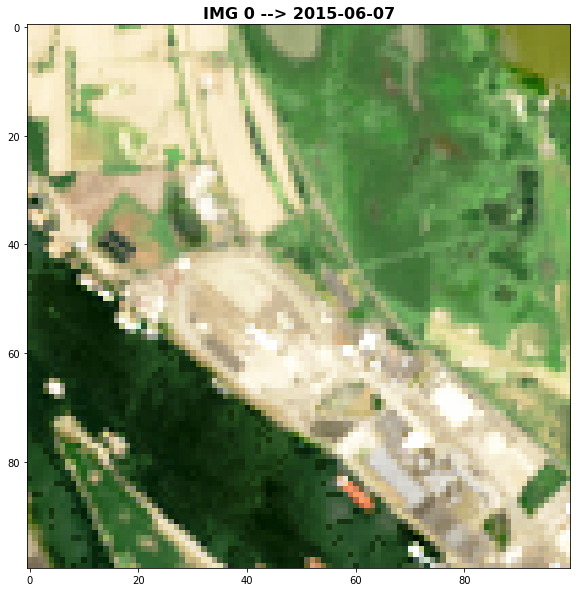

In [7]:
from noteLib import plot_labeled_rgb
ntime = len(dc_xarray.time)

t=0
cnt=0
figsize=[10,10] # 10 inches by 10 inches
plot_labeled_rgb(dc_xarray, t, cnt, figsize=figsize)

True

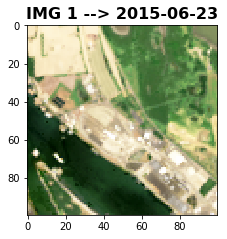

In [8]:
t=1
cnt=1
figsize=[3.5,3.5]
plot_labeled_rgb(dc_xarray, t, cnt, figsize=figsize)

# NEXT: load the only the bands for ndvi ndwi for the 100x100 chip

In [9]:
measurements=['red','nir','swir1']

h=3
v=3
ch=19
vh=18

dataset = dc_load_tile_chip(h,v,ch,cv,datasets=clear_list,measurements=measurements)


# The xarray is often times labeled as a dataset

In [10]:
dataset

<xarray.Dataset>
Dimensions:  (time: 3, x: 100, y: 100)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-07T18:55:15.831248 ... 2015-07-09T18:55:32.978324
  * y        (y) float64 2.811e+06 2.811e+06 2.811e+06 ... 2.808e+06 2.808e+06
  * x        (x) float64 -2.059e+06 -2.059e+06 ... -2.056e+06 -2.056e+06
Data variables:
    red      (time, y, x) int16 1592 1586 1519 1525 1297 ... 1036 1228 1102 1082
    nir      (time, y, x) int16 2322 2327 2324 2270 2453 ... 1405 1740 1405 1295
    swir1    (time, y, x) int16 2830 2810 2775 2702 2413 ... 1258 1301 1254 1119
Attributes:
    crs:      epsg:5072

# NDVI

NDVI = (NIR — VIS)/(NIR + VIS)

Calculations of NDVI for a given pixel always result in a number that ranges from minus one (-1) to plus one (+1); however, no green leaves gives a value close to zero. A zero means no vegetation and close to +1 (0.8 - 0.9) indicates the highest possible density of green leaves. 

# XARRAYs are neat

## 1. band math is on the **entire** array no matter how many observations
2. Human readable labels on the dim are useful such as
- time
- band_names
- x, y
- lat, lon
- etc.

In [11]:
#Calculate NDVI
ndvi = (dataset.nir - dataset.red)/(dataset.nir + dataset.red)

In [12]:
from matplotlib import pyplot

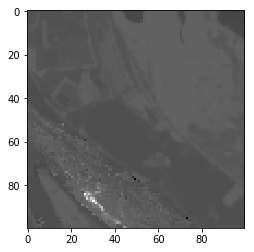

In [13]:
ary = ndvi[2]
pyplot.imshow(ary, cmap='gray')
pyplot.show()

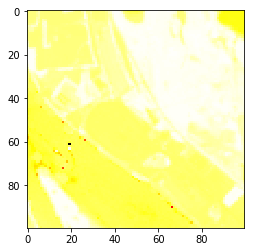

In [14]:
ary = ndvi[1]
pyplot.imshow(ary, cmap='hot')
pyplot.show()

Counter = 0 2015-06-07T18:55:15.831248000


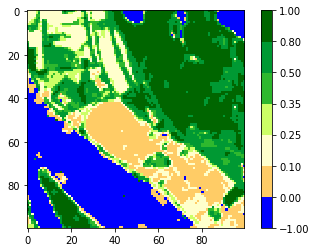

Counter = 1 2015-06-23T18:55:22.285077000


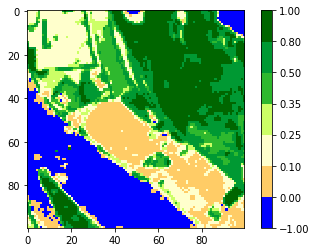

Counter = 2 2015-07-09T18:55:32.978324000


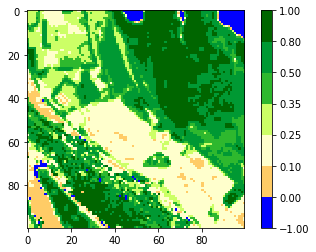

In [15]:
import matplotlib
ndvi_cmap = matplotlib.colors.ListedColormap(['blue', '#ffcc66','#ffffcc' , '#ccff66' , '#2eb82e', '#009933' , '#006600'])
ndvi_bounds = [-1, 0, 0.1, 0.25, 0.35, 0.5, 0.8, 1]
ndvi_norm = matplotlib.colors.BoundaryNorm(ndvi_bounds,ndvi_cmap.N)

ntime = len(ndvi)
for itime in range(0,ntime):
    ary = ndvi[itime]
    print('Counter = %s %s' % (itime,dataset.time[itime].values))
    pyplot.imshow(ary, cmap=ndvi_cmap, norm = ndvi_norm)
    pyplot.colorbar()
    pyplot.show()


# the 3rd NDVI is not like the others

- display the images and see if anything pops out

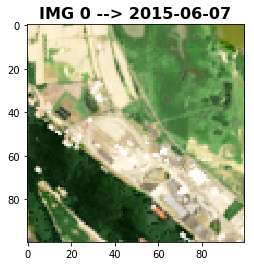

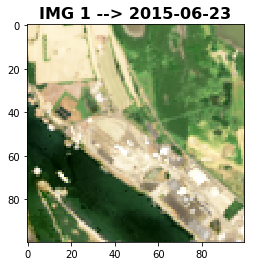

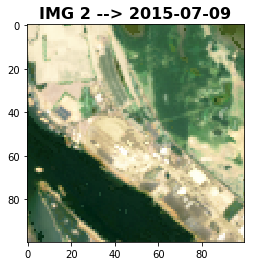

In [16]:
t=1
figsize=[4,4]
for cnt in range(0,3):
    t = cnt
    plot_labeled_rgb(dc_xarray, t, cnt, figsize=figsize)

In [17]:
ndwi = (dataset.nir - dataset.swir1)/(dataset.nir + dataset.swir1)

Counter = 0 2015-06-07T18:55:15.831248000


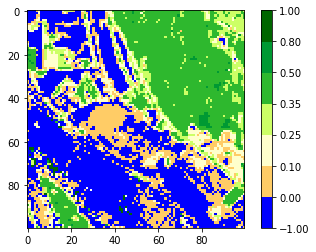

Counter = 1 2015-06-23T18:55:22.285077000


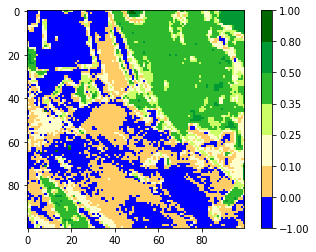

Counter = 2 2015-07-09T18:55:32.978324000


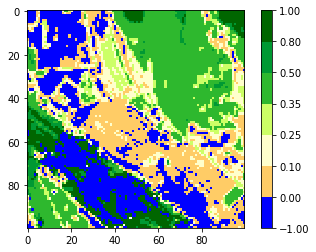

In [18]:
ntime = len(ndwi)
for itime in range(0,ntime):
    ary = ndwi[itime]
    print('Counter = %s %s' % (itime,dataset.time[itime].values))
    pyplot.imshow(ary, cmap=ndvi_cmap, norm = ndvi_norm)
    pyplot.colorbar()
    pyplot.show()


# Sue Jensen-Greenlee always had prettier colors - now she sips wine

In [19]:
type(ary)

xarray.core.dataarray.DataArray

In [20]:
ary.shape

(100, 100)

In [21]:
type(ndvi)

xarray.core.dataarray.DataArray

In [22]:
ndvi.shape

(3, 100, 100)

In [23]:
ndwi.shape

(3, 100, 100)

In [24]:
ndvi

<xarray.DataArray (time: 3, y: 100, x: 100)>
array([[[ 0.18651 ,  0.189369, ..., -0.686833, -0.698384],
        [ 0.176921,  0.187136, ..., -0.694794, -0.688172],
        ...,
        [ 0.255539,  0.270898, ...,  0.023798,  0.04469 ],
        [ 0.29421 ,  0.30094 , ...,  0.081967,  0.027424]],

       [[ 0.18189 ,  0.175704, ..., -0.476316, -0.47676 ],
        [ 0.180937,  0.174923, ..., -0.470356, -0.474801],
        ...,
        [ 0.265036,  0.221014, ...,  0.026475,  0.046326],
        [ 0.309859,  0.319602, ...,  0.082474,  0.028859]],

       [[ 0.326367,  0.30981 , ..., -0.270869, -0.271215],
        [ 0.319764,  0.285752, ..., -0.278246, -0.278798],
        ...,
        [ 0.2231  ,  0.254237, ...,  0.089337,  0.099883],
        [ 0.248568,  0.257321, ...,  0.120862,  0.089609]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-06-07T18:55:15.831248 ... 2015-07-09T18:55:32.978324
  * y        (y) float64 2.811e+06 2.811e+06 2.811e+06 ... 2.808e+06 2.808e+06
  * x        (x) 

# About the Bucket

In [25]:
! aws s3 ls

2017-10-24 01:18:52 cloudsploitlambda-471850042218
2017-08-31 22:55:28 erosodc1
2018-10-31 04:32:52 ga-autobots-elk-471850042218-logsstac-trailbucket-rk21t6aox8cf
2018-09-26 16:42:51 ga-odc-eros-archive-west
2017-09-29 10:32:45 ga-odc-eros-ard-west
2018-07-25 07:15:30 guarddutyslacklambda-471850042218
2017-05-26 00:29:35 lcmap-washington-state
2018-02-07 22:29:00 usgs-devs-tfstate


In [26]:
! sudo aws s3 ls ga-odc-eros-ard-west

! aws s3 ls ga-odc-eros-ard-west/usard/

! aws s3 ls ga-odc-eros-ard-west/usard/LC08/

! aws s3 ls ga-odc-eros-ard-west/usard/LC08/20130414/



                           PRE cog/
                           PRE espa-tonybutzer@gmail.com-09292018-071323-761/
                           PRE espa-tonybutzer@gmail.com-09292018-071332-964/
                           PRE espa-tonybutzer@gmail.com-09292018-071344-011/
                           PRE espa-tonybutzer@gmail.com-10052018-081130-786/
                           PRE espa/
                           PRE usard/
2017-09-16 20:52:14       6032 AAlist.html
                           PRE LC08/
                           PRE LE07/
                           PRE LT05/
2018-10-01 17:34:25        143 usard_readme.md
                           PRE 20130414/
                           PRE 20130421/
                           PRE 20130423/
                           PRE 20130430/
                           PRE 20130516/
                           PRE 20130523/
                           PRE 20130525/
                           PRE 20130601/
                           PRE 20130608/
       

2018-10-01 18:18:41      66463 LC08_CU_003003_20130414_20170713_C01_V01.xml
2018-10-01 18:18:41     160971 LC08_CU_003003_20130414_20170713_C01_V01_LINEAGEQA.tif
2018-10-01 18:18:41    1342485 LC08_CU_003003_20130414_20170713_C01_V01_PIXELQA.tif
2018-10-01 18:18:41     138029 LC08_CU_003003_20130414_20170713_C01_V01_RADSATQA.tif
2018-10-01 18:18:41    1837745 LC08_CU_003003_20130414_20170713_C01_V01_SRAEROSOLQA.tif
2018-10-01 18:18:41   39298042 LC08_CU_003003_20130414_20170713_C01_V01_SRB1.tif
2018-10-01 18:18:42   38523848 LC08_CU_003003_20130414_20170713_C01_V01_SRB2.tif
2018-10-01 18:18:41   38000602 LC08_CU_003003_20130414_20170713_C01_V01_SRB3.tif
2018-10-01 18:18:41   38095706 LC08_CU_003003_20130414_20170713_C01_V01_SRB4.tif
2018-10-01 18:18:41   38376794 LC08_CU_003003_20130414_20170713_C01_V01_SRB5.tif
2018-10-01 18:18:42   35673838 LC08_CU_003003_20130414_20170713_C01_V01_SRB6.tif
2018-10-01 18:18:42   34596878 LC08_CU_003003_20130414_20170713_C01_V01_SRB7.tif


In [27]:
! sudo aws s3 ls ga-odc-eros-ard-west/usard/LC08/20130414/LC08_CU_003003_20130414_20170713_C01_V01.xml


! sudo aws s3 ls ga-odc-eros-ard-west/usard/LC08/20130414/LC08_CU_003003_20130414_20170713_C01_V01_PIXELQA.tif

! echo and the SR data Band 1

! sudo aws s3 ls ga-odc-eros-ard-west/usard/LC08/20130414/LC08_CU_003003_20130414_20170713_C01_V01_SRB1.tif


2018-10-01 18:18:41      66463 LC08_CU_003003_20130414_20170713_C01_V01.xml
2018-10-01 18:18:41    1342485 LC08_CU_003003_20130414_20170713_C01_V01_PIXELQA.tif
and the SR data Band 1
2018-10-01 18:18:41   39298042 LC08_CU_003003_20130414_20170713_C01_V01_SRB1.tif


In [28]:
! gdalinfo /vsis3/ga-odc-eros-ard-west/usard/LC08/20130414/LC08_CU_003003_20130414_20170713_C01_V01_SRB1.tif

Driver: GTiff/GeoTIFF
Files: /vsis3/ga-odc-eros-ard-west/usard/LC08/20130414/LC08_CU_003003_20130414_20170713_C01_V01_SRB1.tif
Size is 5000, 5000
Coordinate System is:
PROJCS["Albers",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378140,298.2569999999957,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (-2115585.000000000000000,2864805.000000000000000)
Pixel Size = (30.000000000000000,-30.000000000000000)
Metadata:
  AREA_OR_POINT=Area
  Band_1=band 1 surface reflectance
Imag

In [29]:
!(cd /opt/espaDog/aws_lambda/glacier && ./all_buckets.sh)

HI
ga-odc-eros-archive-west
bucket ga-odc-eros-archive-west
prefix 
INFO,botocore.credentials,2018-11-02 15:28:51,564,Found credentials in shared credentials file: ~/.aws/credentials,
INFO,boto3.resources.collection,2018-11-02 15:28:51,605,Calling paginated s3:list_objects with {'Bucket': 'ga-odc-eros-archive-west', 'Prefix': ''},
INFO,botocore.vendored.requests.packages.urllib3.connectionpool,2018-11-02 15:28:51,608,Starting new HTTPS connection (1): ga-odc-eros-archive-west.s3.amazonaws.com,
COUNT= 61655
STANDARD 2452
STANDARD 158822441
STANDARD GBYTES= 0.14791492465883493
STANDARD Cost/Month= 0.0034020432671532036
----------------------------------------------------------------------------------------------------
GLACIER 59203
GLACIER 5972649051974
GLACIER GBYTES= 5562.462892359123
GLACIER Cost/Month= 38.93724024651386
----------------------------------------------------------------------------------------------------
ga-odc-eros-ard-west
bucket ga-odc-eros-ard-west
prefix 
INFO,bot

In [30]:
!date

Fri Nov  2 15:29:48 UTC 2018


# The End